# Data Understanding



In [36]:
# data processing
import pandas as pd
import numpy as np
# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# statistik
from scipy import stats

from datetime import datetime

import warnings 
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test/Challenge 1 - E-Commerce.csv', sep=';',engine ='python')


In [52]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9,01-Apr-20,2.55,22143.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,9,01-Apr-20,3.39,22143.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,11,01-Apr-20,2.75,22143.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,9,01-Apr-20,3.39,22143.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,9,01-Apr-20,3.39,22143.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,15,10-Apr-21,0.85,16973.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,9,10-Apr-21,2.10,16973.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,10-Apr-21,4.15,16973.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,10-Apr-21,4.15,16973.0,France


In [53]:
df.shape

(541909, 8)

In [54]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,10.736214,4.611114,19580.690570
std,218.161773,96.759853,1713.600303
min,-80995.000000,-11062.060000,16639.000000
25%,1.000000,1.250000,18246.000000
50%,3.000000,2.080000,19445.000000
75%,13.000000,4.130000,21084.000000
max,80998.000000,38970.000000,22580.000000


In [55]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [57]:
# Mengubah format tanggal pada tabel invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceDate'].sort_values(ascending=True)

0        2020-04-01
2066     2020-04-01
2067     2020-04-01
2068     2020-04-01
2069     2020-04-01
            ...    
540815   2021-04-10
540814   2021-04-10
540813   2021-04-10
540823   2021-04-10
541908   2021-04-10
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [58]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [77]:
for i in df.select_dtypes(include=['object']).columns:
  print(f"Unique Value dari {i}: ",df[i].nunique())
  print(df[i].value_counts())
  print('\n')

Unique Value dari InvoiceNo:  22190
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C554973      1
571900       1
577607       1
C549545      1
C544422      1
Name: InvoiceNo, Length: 22190, dtype: int64


Unique Value dari StockCode:  3684
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
84387A       1
44242A       1
90024C       1
16161M       1
90078        1
Name: StockCode, Length: 3684, dtype: int64


Unique Value dari Description:  3896
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
WHITE CHERRY LIGHTS                      1
PINK POLKADOT KIDS BAG                   1
BIRD ON BRANCH CANVAS SCREEN             1
PINK FLOCK PHOTO FRAME                   1
JET BLACK LAS VEGAS BRACELET ROUND     

In [78]:
df["CustomerID"].nunique()

4372

Dataset awal berisikan transaksi penjualan pada E-Commerce dari total 25.900 invoice dan 4372 customer sejak tangga 1 April 2020 hingga 10 April 2021 di 38 negara. Total transaksi barang yaitu sejumlah 541.909 transaksi pada 3.896 jenis barang.

## Unit Analysis
Setiap baris berisi transaksi penjualan satu barang (berurutan berdasar nomor invoice)

| Variables |Data Type|  Description  | 
| --- | --- | --- |
|InvoiceNo       |object| Nomor invoice transaksi |
|StockCode       |object| Nomor kode barang |
|Description     |object| Deskripsi barang |
|Quantity         |int64| Jumlah barang |
|InvoiceDate     |datetime| Tanggal invoice |
|UnitPrice      |float64| Harga barang per pcs |
|CustomerID     |float64| Nomor ID Customer |
|Country         |object| Negara |


# Exploratory Data Analysis (EDA)

## 1. Identify duplicate value

In [60]:
# Cek duplikasi data
df.duplicated().any()

True

In [61]:
df.duplicated().sum()

5269

In [62]:
df.loc[df.duplicated(), :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2020-04-01,1.25,22201.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2020-04-01,2.10,22201.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2020-04-01,2.95,22201.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2020-04-01,4.95,22201.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2020-04-01,2.95,22213.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2021-04-10,0.39,18739.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2021-04-10,2.49,18739.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2021-04-10,1.95,18739.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2021-04-10,2.10,18739.0,United Kingdom


In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9,2020-04-01,2.55,22143.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,9,2020-04-01,3.39,22143.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,11,2020-04-01,2.75,22143.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,9,2020-04-01,3.39,22143.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,9,2020-04-01,3.39,22143.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,15,2021-04-10,0.85,16973.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,9,2021-04-10,2.10,16973.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2021-04-10,4.15,16973.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2021-04-10,4.15,16973.0,France


## 2. Identify missing value

In [65]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Dalam hal ini missing value customer ID akan di drop karena tidak bisa diisi dengan teknik tertentu. Kemudian akan dilakukan pengecekan data customer ID pada data missing value Description.

In [66]:
df[df['Description'].isna()].nunique()

InvoiceNo      1454
StockCode       960
Description       0
Quantity        266
InvoiceDate     212
UnitPrice         1
CustomerID        0
Country           1
dtype: int64

In [67]:
df[df['Description'].isna()]['CustomerID']

622      NaN
1970     NaN
1971     NaN
1972     NaN
1987     NaN
          ..
535322   NaN
535326   NaN
535332   NaN
536981   NaN
538554   NaN
Name: CustomerID, Length: 1454, dtype: float64

Dapat dilihat bahwa pada data missing value Description, semua customer ID juga memiliki data yang kosong. Oleh karena itu, seluruh data NaN akan langsung di drop.

In [68]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9,2020-04-01,2.55,22143.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,9,2020-04-01,3.39,22143.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,11,2020-04-01,2.75,22143.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,9,2020-04-01,3.39,22143.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,9,2020-04-01,3.39,22143.0,United Kingdom
...,...,...,...,...,...,...,...,...
401598,581587,22613,PACK OF 20 SPACEBOY NAPKINS,15,2021-04-10,0.85,16973.0,France
401599,581587,22899,CHILDREN'S APRON DOLLY GIRL,9,2021-04-10,2.10,16973.0,France
401600,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2021-04-10,4.15,16973.0,France
401601,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2021-04-10,4.15,16973.0,France


In [69]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 3. Identify minus quantity

In [79]:
df[df['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2020-04-01,27.50,18820.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2020-04-01,4.65,19604.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2020-04-01,1.65,21841.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2020-04-01,0.29,21841.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2020-04-01,0.29,21841.0,United Kingdom
...,...,...,...,...,...,...,...,...
401158,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2021-04-10,0.83,18690.0,United Kingdom
401242,C581499,M,Manual,-1,2021-04-10,224.69,19791.0,United Kingdom
401409,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2021-04-10,10.95,19604.0,United Kingdom
401410,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2021-04-10,1.25,21608.0,United Kingdom


In [80]:
df_cancelled=df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2020-04-01,27.50,18820.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2020-04-01,4.65,19604.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2020-04-01,1.65,21841.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2020-04-01,0.29,21841.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2020-04-01,0.29,21841.0,United Kingdom
...,...,...,...,...,...,...,...,...
401158,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2021-04-10,0.83,18690.0,United Kingdom
401242,C581499,M,Manual,-1,2021-04-10,224.69,19791.0,United Kingdom
401409,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2021-04-10,10.95,19604.0,United Kingdom
401410,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2021-04-10,1.25,21608.0,United Kingdom


Terdapat total 8.872 transaksi barang yang memiliki kuantitas transaksi minus dengan karakteristik nomor invoice berawalan C. Hal yang dapat disimpulkan sementara adalah bahwa transaksi-transaksi tersebut kemungkinan dibatalkan (cancelled).

In [81]:
df_fin=df[~df.InvoiceNo.str.contains("C")]
df_fin

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9,2020-04-01,2.55,22143.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,9,2020-04-01,3.39,22143.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,11,2020-04-01,2.75,22143.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,9,2020-04-01,3.39,22143.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,9,2020-04-01,3.39,22143.0,United Kingdom
...,...,...,...,...,...,...,...,...
401598,581587,22613,PACK OF 20 SPACEBOY NAPKINS,15,2021-04-10,0.85,16973.0,France
401599,581587,22899,CHILDREN'S APRON DOLLY GIRL,9,2021-04-10,2.10,16973.0,France
401600,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2021-04-10,4.15,16973.0,France
401601,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2021-04-10,4.15,16973.0,France


Total transaksi barang yang berhasil dilakukan yaitu sebanyak 392.731 yaitu sekitar 98.77%, sedangkan sebanyak 1.23% transaksi yang dibatalkan.

# Data Distribution

In [82]:
df_fin.describe()

,Quantity,UnitPrice,CustomerID
count,392731.000000,392731.000000,392731.000000
mean,14.671518,3.125599,19580.736143
std,181.683940,22.240754,1713.569755
min,1.000000,0.000000,16639.000000
25%,2.000000,1.250000,18248.000000
50%,9.000000,1.950000,19443.000000
75%,15.000000,3.750000,21084.000000
max,80998.000000,8142.750000,22580.000000


## Transaction

In [83]:
for i in df_fin.select_dtypes(include=['object']).columns:
  print(f"Unique Value dari {i}: ",df_fin[i].nunique())
  print(df_fin[i].value_counts())
  print('\n')

Unique Value dari InvoiceNo:  18536
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
560599      1
544446      1
569725      1
574668      1
536400      1
Name: InvoiceNo, Length: 18536, dtype: int64


Unique Value dari StockCode:  3665
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
85031B       1
84802A       1
85109        1
21895        1
37351        1
Name: StockCode, Length: 3665, dtype: int64


Unique Value dari Description:  3877
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
                                      ... 
GLASS BELL JAR LARGE                     1
CLASSIC DIAMANTE EARRINGS JET            1
SET/5 RED SPOTTY LID GLASS BOWLS         1
BLACK CHERRY LIGHTS                      1
 I LOVE LONDON MINI RUCKSACK             1
Name: D

Telah diketahui sebelumnya otal transaksi barang yang berhasil dilakukan yaitu sebanyak 392.731 yaitu sekitar 98.77%, sedangkan sebanyak 1.23% transaksi yang dibatalkan.

Dataset setelah preprocessing berisikan transaksi penjualan pada E-Commerce dari total **18.536 invoice** dan **4.339 customer** sejak tanggal **1 April 2020 hingga 10 April 2021** di **38 negara**. Total transaksi barang yaitu sejumlah **392.731 transaksi** pada **3.877 jenis barang**.

## Price

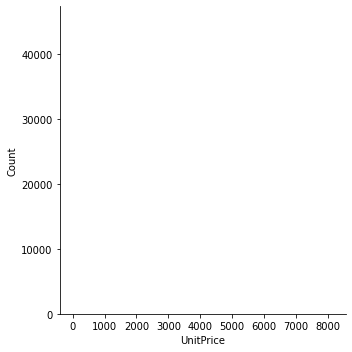

In [84]:
sns.displot(df_fin["UnitPrice"])

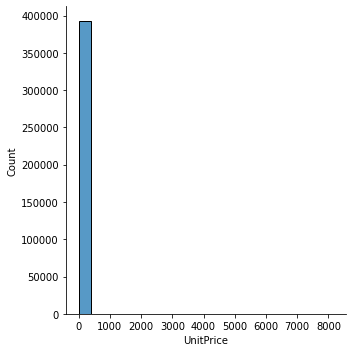

In [73]:
sns.displot(df_fin, x="UnitPrice", bins=20)

## Quantity

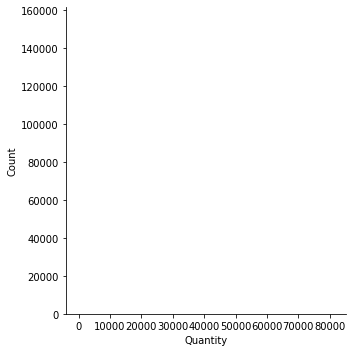

In [74]:
sns.displot(df_fin, x="Quantity", binwidth=3)

## Jumlah kuantitas barang yang dibeli

Berikut top20 barang yang paling banyak dibeli.

In [92]:
df_desc_quan = pd.DataFrame(df_fin.groupby('Description',as_index = False).Quantity.sum())
df_desc_quan

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,165
1,50'S CHRISTMAS GIFT BAG LARGE,2185
2,DOLLY GIRL BEAKER,2616
3,I LOVE LONDON MINI BACKPACK,386
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,5518
3873,ZINC TOP 2 DOOR WOODEN SHELF,10
3874,ZINC WILLIE WINKIE CANDLE STICK,3056
3875,ZINC WIRE KITCHEN ORGANISER,25


In [93]:
df_desc_quan_20 = df_desc_quan.sort_values(by='Quantity',ascending=False)[:20]
df_desc_quan_20

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80998
1992,MEDIUM CERAMIC TOP STORAGE JAR,78330
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55717
1762,JUMBO BAG RED RETROSPOT,49786
3698,WHITE HANGING HEART T-LIGHT HOLDER,40735
216,ASSORTED COLOUR BIRD ORNAMENT,39172
2269,PACK OF 72 RETROSPOT CAKE CASES,35887
2600,POPCORN HOLDER,32416
2656,RABBIT NIGHT LIGHT,28980
2047,MINI PAINT SET VINTAGE,27033


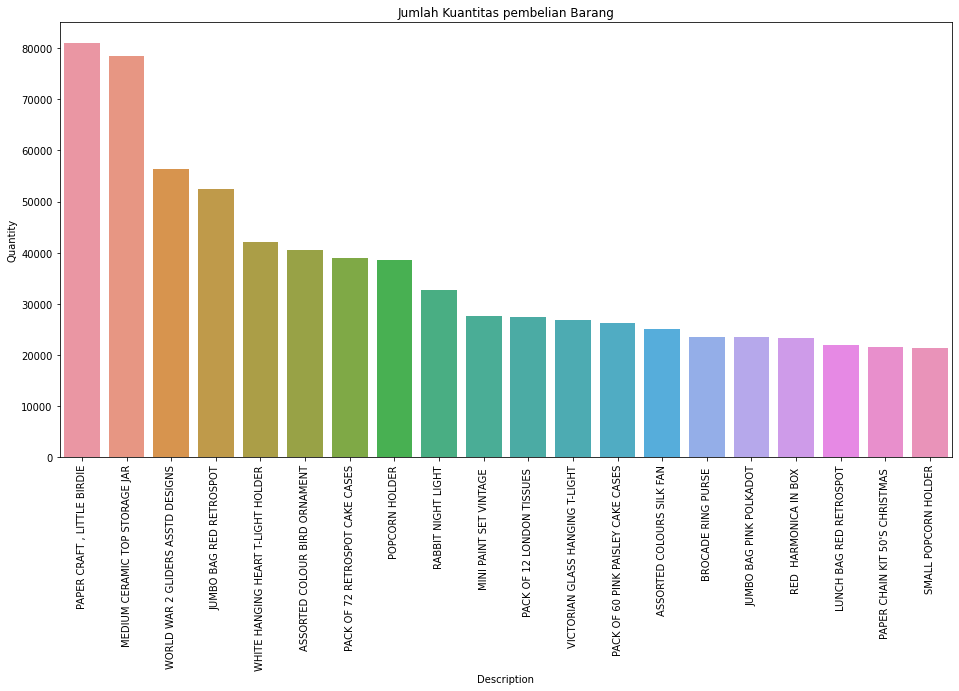

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_desc_quan_20, x='Description', y='Quantity')
plt.title('Jumlah Kuantitas pembelian Barang')
plt.xticks(rotation=90)
plt.show()


# Text Mining

Melihat ciri kata yg sering muncul di Description.

In [94]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [95]:
from wordcloud import WordCloud
from PIL import Image

mask = np.array(Image.open('comment.png'))

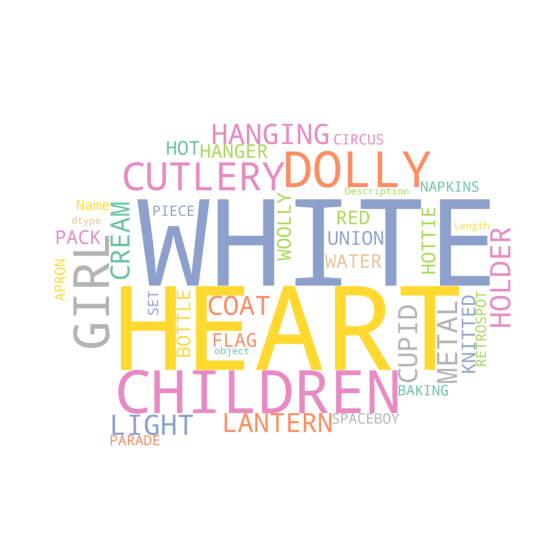

In [96]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                      background_color='white', 
                      colormap='Set2',
                      mask=mask).generate(str(df['Description']))

plot_cloud(wordcloud)